In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
from torch.utils.data import TensorDataset, DataLoader
import random
import math
import time
import sys
import os

sys.path.append(os.path.abspath("./neat"))

from nn import *
from mutation import *
from speciation import *

random.seed(42)
torch.manual_seed(42)

In [8]:
model = torch.load("./models/sklearn_digits_100pop_2000epoch_real96.67.pth", weights_only=False)


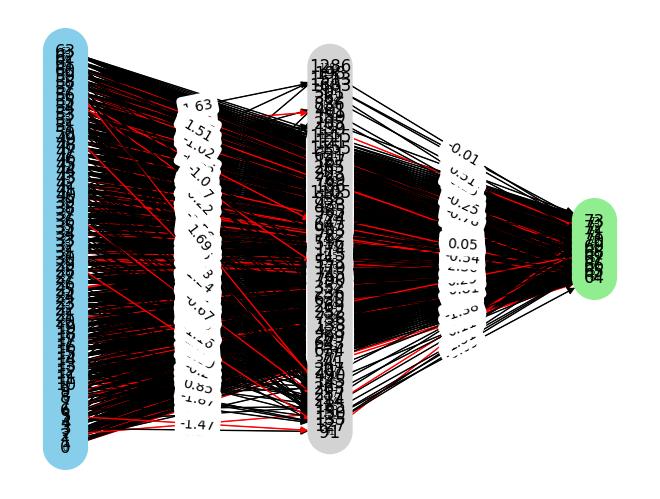

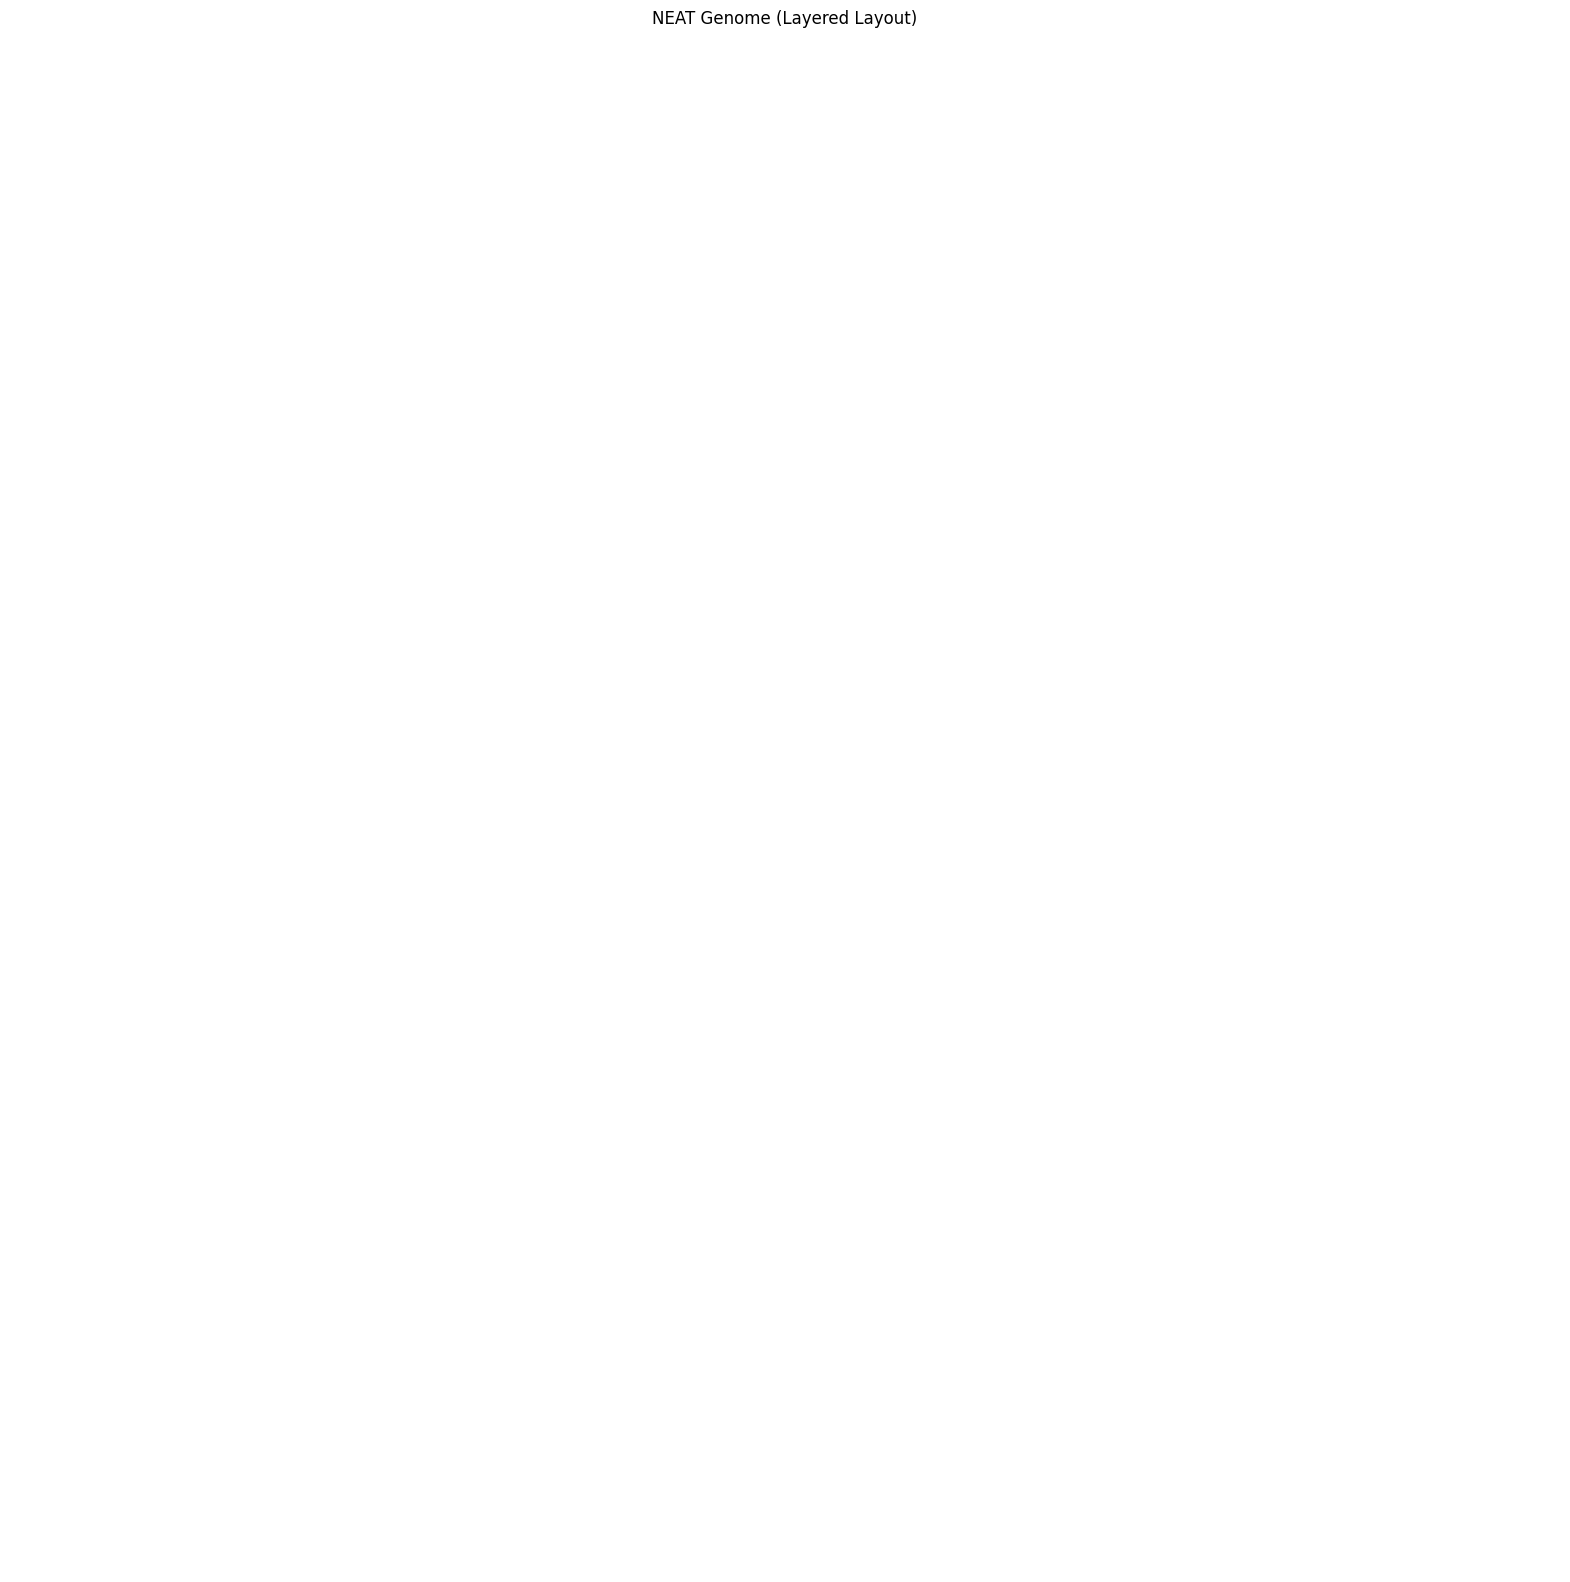

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

nodes = {
    0: 'input',
    1: 'input',
    2: 'output',
    3: 'hidden'
}

nodes = {}

for i in model.nodes:
    if i.is_input:
        nodes.update({i.id: 'input'})
    elif i.is_output:
        nodes.update({i.id: 'output'})
    else:
        nodes.update({i.id: 'hidden'})

connections = [
    {'in': 0, 'out': 3, 'weight': 0.8, 'enabled': True},
    {'in': 1, 'out': 3, 'weight': -0.5, 'enabled': True},
    {'in': 3, 'out': 2, 'weight': 1.0, 'enabled': True},
    {'in': 1, 'out': 2, 'weight': 0.3, 'enabled': False},  # Disabled connection
]

connections = []

for i in model.connections:
    connections.append({'in': int(i.in_node.id), 'out': int(i.out_node.id), 'weight': round(i.weight.item(), 2), 'enabled': bool(i.enable)})

def compute_positions(nodes):
    pos = {}
    # Categorize nodes by type
    inputs = [n for n, t in nodes.items() if t == 'input']
    outputs = [n for n, t in nodes.items() if t == 'output']
    hiddens = [n for n, t in nodes.items() if t == 'hidden']

    # Vertical spacing
    def spaced_y(n, total):
        return [(i - total / 2) for i in range(total)]

    # Assign positions
    for i, nid in enumerate(inputs):
        pos[nid] = (-1, spaced_y(len(inputs), len(inputs))[i])  # Left

    for i, nid in enumerate(hiddens):
        pos[nid] = (0, spaced_y(len(hiddens), len(hiddens))[i])  # Middle

    for i, nid in enumerate(outputs):
        pos[nid] = (1, spaced_y(len(outputs), len(outputs))[i])  # Right

    return pos


def draw_neat_genome(nodes, connections):



    G = nx.DiGraph()



    node_colors = []

    for node_id, node_type in nodes.items():
        G.add_node(node_id, type=node_type)
        color = {
            'input': 'skyblue',
            'output': 'lightgreen',
            'hidden': 'lightgray'
        }.get(node_type, 'white')
        node_colors.append(color)

    edge_colors = []
    for conn in connections:
        G.add_edge(conn['in'], conn['out'], weight=conn['weight'])
        edge_colors.append('black' if conn['enabled'] else 'red')

    pos = compute_positions(nodes)

    nx.draw(G, pos,
    with_labels=True,
    node_color=node_colors,
    edge_color=edge_colors,
    arrows=True,
    node_size=200,       # Smaller nodes
    font_size=6,         # Smaller text
    width=0.5)           # Thinner edges

    nx.draw(G, pos, with_labels=True, node_color=node_colors,
            edge_color=edge_colors, arrows=True, node_size=1000)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)


    
    plt.figure(figsize=(20, 20)) 

    plt.title("NEAT Genome (Layered Layout)")
    plt.axis('off')
    plt.show()


draw_neat_genome(nodes, connections)
